In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import scipy.stats as st

In [2]:
match_path= "Resources/Matches_Results.csv"
odds_path= "Resources/Matches_Odds.csv"

In [3]:
matches=pd.read_csv(match_path)
odds=pd.read_csv(odds_path)

In [4]:
matches.head()

,match_id,date_start,competition_name,home_team_name,away_team_name,home_team_score,away_team_score,final_result
0,1,12/26/2016 12:30,Eng. Premier League,Watford,Crystal Palace,1,1,x
1,2,12/26/2016 15:00,Eng. Premier League,Burnley,Middlesbrough,1,0,1
2,3,12/26/2016 15:00,Eng. Premier League,Manchester United,Sunderland,3,1,1
3,4,12/26/2016 15:00,Eng. Premier League,Swansea,West Ham,1,4,2
4,5,12/26/2016 15:00,Eng. Premier League,Arsenal,West Bromwich Albion,1,0,1


In [5]:
merged_df=pd.merge(matches, odds, on=["match_id"])

In [6]:
merged_df=merged_df.drop(columns=["date_start_y"])

In [7]:
merged_df

,match_id,date_start_x,competition_name_x,home_team_name_x,away_team_name_x,home_team_score,away_team_score,final_result,competition_name_y,date_created,home_team_name_y,away_team_name_y,home_team_odd,away_team_odd,tie_odd
0,1,12/26/2016 12:30,Eng. Premier League,Watford,Crystal Palace,1,1,x,Eng. Premier League,12/26/2016 12:00,Watford,Crystal Palace,2.35,3.10,3.10
1,1,12/26/2016 12:30,Eng. Premier League,Watford,Crystal Palace,1,1,x,Eng. Premier League,12/26/2016 6:45,Watford,Crystal Palace,2.40,3.00,3.25
2,1,12/26/2016 12:30,Eng. Premier League,Watford,Crystal Palace,1,1,x,Eng. Premier League,12/26/2016 3:35,Watford,Crystal Palace,2.40,3.10,3.10
3,1,12/26/2016 12:30,Eng. Premier League,Watford,Crystal Palace,1,1,x,Eng. Premier League,12/23/2016 19:45,Watford,Crystal Palace,2.45,2.90,3.25
4,1,12/26/2016 12:30,Eng. Premier League,Watford,Crystal Palace,1,1,x,Eng. Premier League,12/25/2016 15:20,Watford,Crystal Palace,2.45,3.00,3.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466669,844769,5/23/2018 19:44,French Ligue 1 Playoffs,Ajaccio,Toulouse,0,3,2,French Ligue 1 Playoffs,5/23/2018 18:35,Ajaccio,Toulouse,3.60,2.11,3.00
466670,844769,5/23/2018 19:44,French Ligue 1 Playoffs,Ajaccio,Toulouse,0,3,2,French Ligue 1 Playoffs,5/23/2018 18:25,Ajaccio,Toulouse,3.65,2.08,3.00
466671,844769,5/23/2018 19:44,French Ligue 1 Playoffs,Ajaccio,Toulouse,0,3,2,French Ligue 1 Playoffs,5/23/2018 13:35,Ajaccio,Toulouse,3.65,2.10,2.95
466672,844769,5/23/2018 19:44,French Ligue 1 Playoffs,Ajaccio,Toulouse,0,3,2,French Ligue 1 Playoffs,5/23/2018 13:40,Ajaccio,Toulouse,3.75,2.05,3.00


In [8]:
merged_df['Favourite'] = merged_df[['home_team_odd','away_team_odd',]].min(axis=1)

In [9]:
merged_df

,match_id,date_start_x,competition_name_x,home_team_name_x,away_team_name_x,home_team_score,away_team_score,final_result,competition_name_y,date_created,home_team_name_y,away_team_name_y,home_team_odd,away_team_odd,tie_odd,Favourite
0,1,12/26/2016 12:30,Eng. Premier League,Watford,Crystal Palace,1,1,x,Eng. Premier League,12/26/2016 12:00,Watford,Crystal Palace,2.35,3.10,3.10,2.35
1,1,12/26/2016 12:30,Eng. Premier League,Watford,Crystal Palace,1,1,x,Eng. Premier League,12/26/2016 6:45,Watford,Crystal Palace,2.40,3.00,3.25,2.40
2,1,12/26/2016 12:30,Eng. Premier League,Watford,Crystal Palace,1,1,x,Eng. Premier League,12/26/2016 3:35,Watford,Crystal Palace,2.40,3.10,3.10,2.40
3,1,12/26/2016 12:30,Eng. Premier League,Watford,Crystal Palace,1,1,x,Eng. Premier League,12/23/2016 19:45,Watford,Crystal Palace,2.45,2.90,3.25,2.45
4,1,12/26/2016 12:30,Eng. Premier League,Watford,Crystal Palace,1,1,x,Eng. Premier League,12/25/2016 15:20,Watford,Crystal Palace,2.45,3.00,3.10,2.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466669,844769,5/23/2018 19:44,French Ligue 1 Playoffs,Ajaccio,Toulouse,0,3,2,French Ligue 1 Playoffs,5/23/2018 18:35,Ajaccio,Toulouse,3.60,2.11,3.00,2.11
466670,844769,5/23/2018 19:44,French Ligue 1 Playoffs,Ajaccio,Toulouse,0,3,2,French Ligue 1 Playoffs,5/23/2018 18:25,Ajaccio,Toulouse,3.65,2.08,3.00,2.08
466671,844769,5/23/2018 19:44,French Ligue 1 Playoffs,Ajaccio,Toulouse,0,3,2,French Ligue 1 Playoffs,5/23/2018 13:35,Ajaccio,Toulouse,3.65,2.10,2.95,2.10
466672,844769,5/23/2018 19:44,French Ligue 1 Playoffs,Ajaccio,Toulouse,0,3,2,French Ligue 1 Playoffs,5/23/2018 13:40,Ajaccio,Toulouse,3.75,2.05,3.00,2.05


In [10]:
clean_df=merged_df.drop_duplicates(subset=['match_id', 'date_start_x'])

In [11]:
clean_df

,match_id,date_start_x,competition_name_x,home_team_name_x,away_team_name_x,home_team_score,away_team_score,final_result,competition_name_y,date_created,home_team_name_y,away_team_name_y,home_team_odd,away_team_odd,tie_odd,Favourite
0,1,12/26/2016 12:30,Eng. Premier League,Watford,Crystal Palace,1,1,x,Eng. Premier League,12/26/2016 12:00,Watford,Crystal Palace,2.35,3.10,3.10,2.35
8,2,12/26/2016 15:00,Eng. Premier League,Burnley,Middlesbrough,1,0,1,Eng. Premier League,12/26/2016 13:45,Burnley,Middlesbrough,2.75,2.70,3.00,2.70
18,3,12/26/2016 15:00,Eng. Premier League,Manchester United,Sunderland,3,1,1,Eng. Premier League,12/26/2016 15:00,Manchester United,Sunderland,1.17,15.00,6.75,1.17
30,4,12/26/2016 15:00,Eng. Premier League,Swansea,West Ham,1,4,2,Eng. Premier League,12/26/2016 8:45,Swansea,West Ham,2.20,3.10,3.40,2.20
44,5,12/26/2016 15:00,Eng. Premier League,Arsenal,West Bromwich Albion,1,0,1,Eng. Premier League,12/25/2016 13:15,Arsenal,West Bromwich Albion,1.28,10.00,5.10,1.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466592,844431,5/23/2018 18:59,Hungarian Cup,Puskas Akademia,Ujpest,2,2,x,Hungarian Cup,5/19/2018 23:15,Puskas Akademia,Ujpest,2.20,3.00,3.10,2.20
466608,844467,5/20/2018 15:59,Moldovan Div. 1,Dinamo Auto,Sfintul Gheorghe,0,0,x,Moldovan Div. 1,5/19/2018 19:50,Dinamo Auto,Sfintul Gheorghe,1.83,3.60,3.50,1.83
466616,844478,5/21/2018 17:00,Israeli Liga Leumit,Hapoel Afula,Hapoel Katamon,0,2,2,Israeli Liga Leumit,5/21/2018 14:10,Hapoel Afula,Hapoel Katamon,2.37,2.65,3.25,2.37
466622,844621,5/22/2018 17:00,CAF Champions League,Horoya AC,Mamelodi Sundowns,2,2,x,CAF Champions League,5/22/2018 12:15,Horoya AC,Mamelodi Sundowns,1.86,4.00,3.10,1.86


In [12]:
home= clean_df["home_team_odd"]
tie= clean_df["tie_odd"]
away= clean_df["away_team_odd"]
favourite= clean_df["Favourite"]

In [13]:
home

0         2.35
8         2.75
18        1.17
30        2.20
44        1.28
          ... 
466592    2.20
466608    1.83
466616    2.37
466622    1.86
466648    2.60
Name: home_team_odd, Length: 32345, dtype: float64

Text(0.5, 1.0, 'Home vs Away')

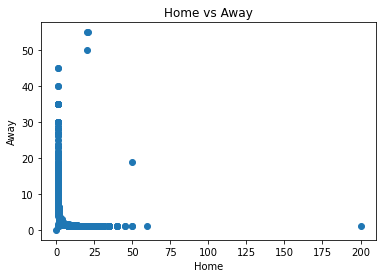

In [17]:
plt.scatter(away, home)
plt.ylabel("Away")
plt.xlabel("Home")
plt.title("Home vs Away")

In [15]:
correlation= (st.pearsonr(away,home)[0])
#correlation
print(f" the correlation is {correlation}")

 the correlation is -0.32770400095091795


Text(0.5, 1.0, 'Odds vs Location')

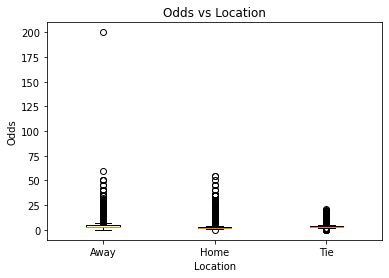

In [16]:
data=[away,home,tie]
plt.boxplot(data)
plt.xticks([1, 2, 3], ['Away','Home', 'Tie'])
plt.ylabel("Odds")
plt.xlabel("Location")
plt.title("Odds vs Location")